In [2]:
import numpy as np
import pandas as pd
import pymrio

In [3]:
path_exiobase = r'C:\Users\pellan\OneDrive - CSTBGroup\Thèse stratégie carbone\DATA\Exiobase'

# Load Exiobase3 using pymrio

In [5]:
exio = pymrio.parse_exiobase3 (path=path_exiobase + "\IOT_2021_pxp")

OSError: [Errno 22] Invalid argument

In [4]:
exio.calc_all()

# Final demand for construction in France

In [5]:
exio.Y.FR.loc['FR', 'Construction work (45)']

category
Final consumption expenditure by households                                               9095.306996
Final consumption expenditure by non-profit organisations serving households (NPISH)         0.000000
Final consumption expenditure by government                                                  0.000000
Gross fixed capital formation                                                           286712.940443
Changes in inventories                                                                     386.281594
Changes in valuables                                                                         0.000000
Exports: Total (fob)                                                                         0.000000
Name: (FR, Construction work (45)), dtype: float64

In [6]:
Y_FR_construction = exio.Y.FR.loc['FR', 'Construction work (45)'].sum()
Y_FR_construction

296194.529032943

In [7]:
# Final demand for buildings, considering removed civil engineering share (derived from INSEE inter industry exchanges)
Y_FR_buildings = Y_FR_construction * 0.85
Y_FR_buildings

251765.34967800154

# Calculate direct requirements for the GWP100

In [8]:
f = exio.impacts.S.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

In [9]:
# We diagonlise the impact 
diag_f = pd.DataFrame(np.diag(f))

In [10]:
# Put the same index and columns as the inter industry matrix
diag_f.index = exio.A.index 
diag_f.columns = exio.A.index

In [11]:
diag_f

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                               0.0   
       Wheat                                                    0.0   
       Cereal grains nec                                        0.0   
       Vegetables, fruit, nuts                                  0.0   
       Oil seeds                                                0.0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)             0.0   
       Recreational, cultural and sporting services (92)        0.0   
       Other services (93)                                      0.0   
       Private households with employed persons (95)            0.0   
       Extra-territorial organizations and bodies               0.0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.690932e+06   
       Cereal grains nec                                  0.000000e+00   
       Vegetables, fruit, nuts                            0.000000e+00   
       Oil seeds                                          0.000000e+00   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  0.000000e+00   
       Other services (93)                                0.000000e+00   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                                 0.000000   
       Wheat                                                      0.000000   
       Cereal grains nec                                     935119.414396   
       Vegetables, fruit, nuts                                    0.000000   
       Oil seeds                                                  0.000000   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)               0.000000   
       Recreational, cultural and sporting services (92)          0.000000   
       Other services (93)                                        0.000000   
       Private households with employed persons (95)              0.000000   
       Extra-territorial organizations and bodies                 0.000000   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                       0.000000   
       Wheat                                                            0.000000   
       Cereal grains nec                                                0.000000   
       Vegetables, fruit, nuts                                     181589.602023   
       Oil seeds                                                        0.000000   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                     0.000000   
       Recreational, cultural and s

# Contribution analysis 

In [12]:
CA = diag_f.dot(exio.L)
CA

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                               0.0   
       Wheat                                                    0.0   
       Cereal grains nec                                        0.0   
       Vegetables, fruit, nuts                                  0.0   
       Oil seeds                                                0.0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)             0.0   
       Recreational, cultural and sporting services (92)        0.0   
       Other services (93)                                      0.0   
       Private households with employed persons (95)            0.0   
       Extra-territorial organizations and bodies               0.0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.748907e+06   
       Cereal grains nec                                  3.452500e+01   
       Vegetables, fruit, nuts                            1.647954e+00   
       Oil seeds                                          9.366478e-01   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       3.119744e-02   
       Recreational, cultural and sporting services (92)  6.801132e-01   
       Other services (93)                                6.820059e-01   
       Private households with employed persons (95)      8.983429e-02   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                                 0.000000   
       Wheat                                                     21.237672   
       Cereal grains nec                                     948757.976662   
       Vegetables, fruit, nuts                                    1.354351   
       Oil seeds                                                  0.723176   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)               0.029662   
       Recreational, cultural and sporting services (92)          0.602702   
       Other services (93)                                        0.609904   
       Private households with employed persons (95)              0.084621   
       Extra-territorial organizations and bodies                 0.000000   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                       0.000000   
       Wheat                                                           32.733709   
       Cereal grains nec                                               43.335898   
       Vegetables, fruit, nuts                                     194880.513114   
       Oil seeds                                                        0.711693   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                     0.028599   
       Recreational, cultural and s

In [13]:
CA_construction_fr = pd.DataFrame(CA.FR['Construction work (45)'])
CA_construction_fr

Construction work (45)
region sector                                                                   
AT     Paddy rice                                                       0.000000
       Wheat                                                            1.344731
       Cereal grains nec                                                1.774077
       Vegetables, fruit, nuts                                          0.110377
       Oil seeds                                                        0.478525
...                                                                          ...
WM     Membership organisation services n.e.c. (91)                     0.067059
       Recreational, cultural and sporting services (92)                1.288613
       Other services (93)                                              2.000700
       Private households with employed persons (95)                    0.282461
       Extra-territorial organizations and bodies                       0.000000

[9800 rows x 1 columns]

In [15]:
footprint_buildings = CA_construction_fr * Y_FR_buildings / 10e8 # In MtCO2eq
footprint_buildings.rename(columns={"Construction work (45)": "Embodied footprint"}, inplace=True)
footprint_buildings.reset_index(inplace=True)
footprint_buildings

,region,sector,MtCO2eq
0,AT,Paddy rice,0.000000
1,AT,Wheat,0.000339
2,AT,Cereal grains nec,0.000447
3,AT,"Vegetables, fruit, nuts",0.000028
4,AT,Oil seeds,0.000120
...,...,...,...
9795,WM,Membership organisation services n.e.c. (91),0.000017
9796,WM,"Recreational, cultural and sporting services (92)",0.000324
9797,WM,Other services (93),0.000504
9798,WM,Private households with employed persons (95),0.000071


In [19]:
#footprint_buildings.sort_values(by='Embodied footprint', ascending=False).to_excel('contribution_analysis_fr_construction.xlsx')

C:\Users\pellan\AppData\Local\Temp\ipykernel_28256\3485362128.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  footprint_buildings.sort_values(by='MtCO2eq', ascending=False).to_excel('contribution_analysis_fr_construction.xlsx')


In [15]:
footprint_buildings['Embodied footprint'].sum() # Embodied GHGE in MtCO2eq

57.91538017828303

# Aggregation with IEA and SECTEN format

In [16]:
print("Sectors: {sec},\nRegions: {reg}".format(sec=exio.get_sectors().tolist(), reg=exio.get_regions().tolist()))

Sectors: ['Paddy rice', 'Wheat', 'Cereal grains nec', 'Vegetables, fruit, nuts', 'Oil seeds', 'Sugar cane, sugar beet', 'Plant-based fibers', 'Crops nec', 'Cattle', 'Pigs', 'Poultry', 'Meat animals nec', 'Animal products nec', 'Raw milk', 'Wool, silk-worm cocoons', 'Manure (conventional treatment)', 'Manure (biogas treatment)', 'Products of forestry, logging and related services (02)', 'Fish and other fishing products; services incidental of fishing (05)', 'Anthracite', 'Coking Coal', 'Other Bituminous Coal', 'Sub-Bituminous Coal', 'Patent Fuel', 'Lignite/Brown Coal', 'BKB/Peat Briquettes', 'Peat', 'Crude petroleum and services related to crude oil extraction, excluding surveying', 'Natural gas and services related to natural gas extraction, excluding surveying', 'Natural Gas Liquids', 'Other Hydrocarbons', 'Uranium and thorium ores (12)', 'Iron ores', 'Copper ores and concentrates', 'Nickel ores and concentrates', 'Aluminium ores and concentrates', 'Precious metal ores and concentrate

In [17]:
agg_countries = pd.read_excel(r'C:\Users\pellan\OneDrive - CSTBGroup\Thèse stratégie carbone\DATA\Exiobase\Concordances\Exiobase_countries_concordance.xlsx', sheet_name='AGG')
agg_sectors = pd.read_excel(r'C:\Users\pellan\OneDrive - CSTBGroup\Thèse stratégie carbone\DATA\Exiobase\Concordances\Exiobase_sectors_concordance.xlsx', sheet_name='AGG')

In [18]:
# Otherwise it doesn't work, must be a problem with the list of Exiobase sectors
agg_sectors['sectors'] = footprint_buildings['sector']

In [19]:
agg_countries_dict_IEA = dict(zip(agg_countries['Exiobase_44_regions'], agg_countries['Agg_IEA_regions']))
agg_sectors_dict_IEA = dict(zip(agg_sectors['sectors'], agg_sectors['Agg_19_sectors']))

In [20]:
agg_countries_dict_SECTEN = dict(zip(agg_countries['Exiobase_44_regions'], agg_countries['3_regions']))
agg_sectors_dict_SECTEN = dict(zip(agg_sectors['sectors'], agg_sectors['SECTEN_sectors']))

In [21]:
footprint_buildings_IEA = footprint_buildings.copy()
footprint_buildings_SECTEN = footprint_buildings.copy()

### IEA 

In [22]:
footprint_buildings_IEA['agg_regions'] = footprint_buildings_IEA['region'].map(agg_countries_dict_IEA)
footprint_buildings_IEA['agg_sectors'] = footprint_buildings_IEA['sector'].map(agg_sectors_dict_IEA)

In [23]:
footprint_buildings_IEA = footprint_buildings_IEA.groupby(['agg_regions','agg_sectors']).sum().reset_index()
footprint_buildings_IEA

C:\Users\pellan\AppData\Local\Temp\ipykernel_28496\1946268269.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  footprint_buildings_IEA = footprint_buildings_IEA.groupby(['agg_regions','agg_sectors']).sum().reset_index()


,agg_regions,agg_sectors,Embodied footprint
0,Africa,"Agriculture, hunting, forestry & fishing",0.847283
1,Africa,Cement,0.232235
2,Africa,Construction,0.051849
3,Africa,Electrical & machinery,0.173996
4,Africa,Electricity,0.407338
...,...,...,...
280,United States,Public administration; education; health; recr...,0.000539
281,United States,Transport,0.096609
282,United States,Waste,0.039233
283,United States,Water & Steam,0.018082


In [24]:
footprint_buildings_IEA['Embodied footprint'].sum()

57.91538017828303

### SNBC 

In [25]:
footprint_buildings_SECTEN['agg_regions'] = footprint_buildings_SECTEN['region'].map(agg_countries_dict_SECTEN)
footprint_buildings_SECTEN['agg_sectors'] = footprint_buildings_SECTEN['sector'].map(agg_sectors_dict_SECTEN)

In [26]:
footprint_buildings_SECTEN = footprint_buildings_SECTEN.groupby(['agg_regions','agg_sectors']).sum().reset_index()
footprint_buildings_SECTEN

C:\Users\pellan\AppData\Local\Temp\ipykernel_28496\1075615901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  footprint_buildings_SECTEN = footprint_buildings_SECTEN.groupby(['agg_regions','agg_sectors']).sum().reset_index()


,agg_regions,agg_sectors,Embodied footprint
0,EU,Agriculture,0.310633
1,EU,Construction,0.092345
2,EU,Energy,3.428095
3,EU,Industry,6.419764
4,EU,LULUCF,0.195782
5,EU,Services,0.599428
6,EU,Transport,0.805765
7,EU,Waste,0.538915
8,France,Agriculture,0.333132
9,France,Construction,2.142322


In [27]:
footprint_buildings_SECTEN['Embodied footprint'].sum()

57.91538017828303

# Visualisation

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## Sunburst

In [35]:
sunburst = px.sunburst(footprint_buildings, path=['region', 'sector'], values='Embodied footprint')
sunburst_IEA = px.sunburst(footprint_buildings_IEA, path=['agg_regions', 'agg_sectors'], values='Embodied footprint')
sunburst_SECTEN = px.sunburst(footprint_buildings_SECTEN, path=['agg_regions', 'agg_sectors'], values='Embodied footprint')

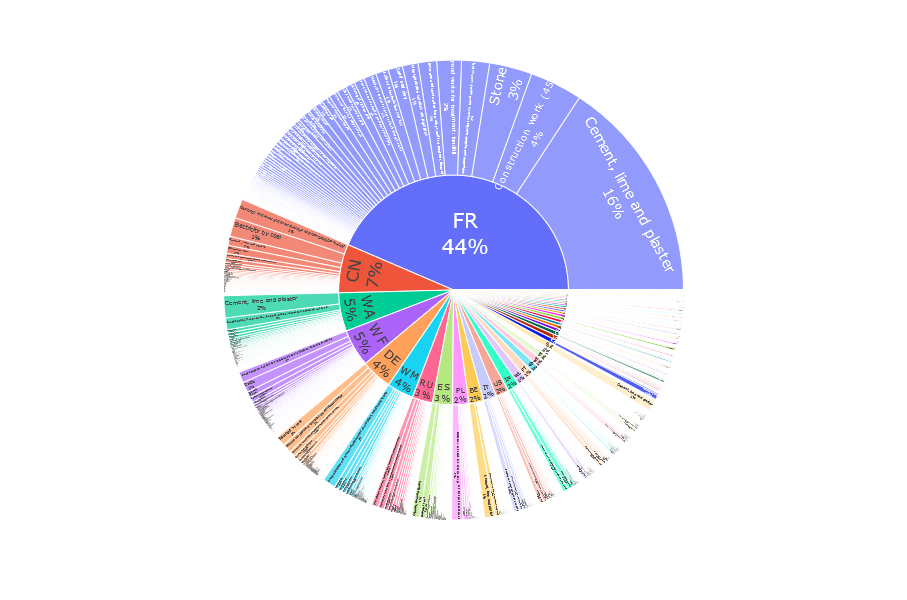

In [36]:
# Adjust the figure size
sunburst.update_layout(
    width=800,  # Set the width of the figure in pixels
    height=600  # Set the height of the figure in pixels
)

# Adjust the font size
sunburst.update_traces(
    textinfo='label+percent entry',
    insidetextfont=dict(size=20)  # Set the font size for the labels inside the sunburst segments
)

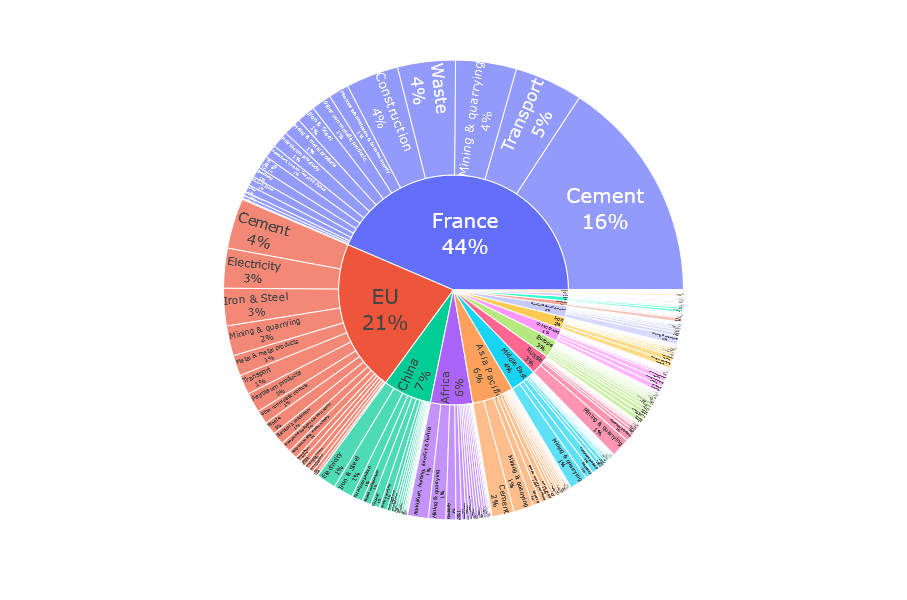

In [37]:
# Adjust the figure size
sunburst_IEA.update_layout(
    width=800,  # Set the width of the figure in pixels
    height=600  # Set the height of the figure in pixels
)

# Adjust the font size
sunburst_IEA.update_traces(
    textinfo='label+percent entry',
    insidetextfont=dict(size=20)  # Set the font size for the labels inside the sunburst segments
)

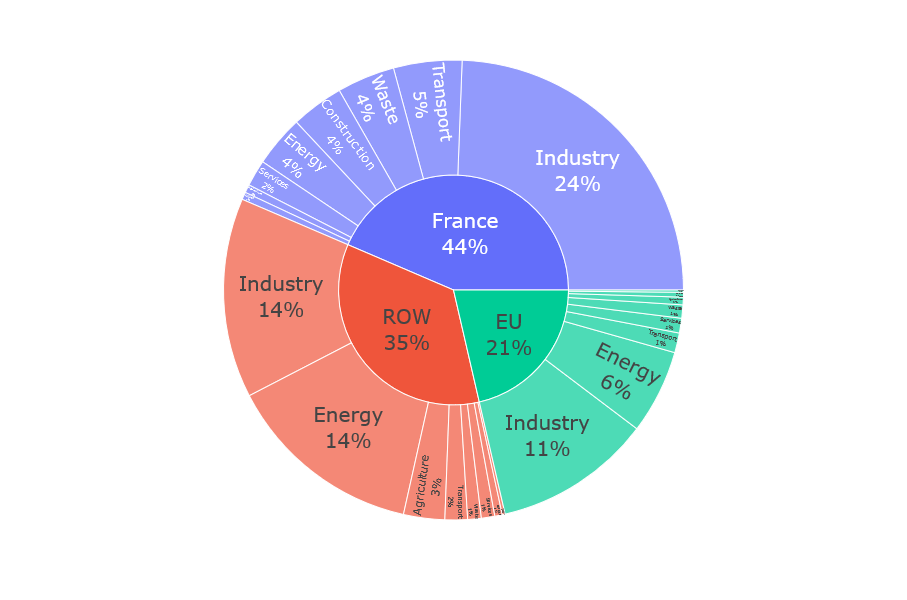

In [38]:
# Adjust the figure size
sunburst_SECTEN.update_layout(
    width=800,  # Set the width of the figure in pixels
    height=600  # Set the height of the figure in pixels
)

# Adjust the font size
sunburst_SECTEN.update_traces(
    textinfo='label+percent entry',
    insidetextfont=dict(size=20)  # Set the font size for the labels inside the sunburst segments
)

# Export 

In [56]:
footprint_buildings_pivot_44r_200p = footprint_buildings.pivot_table(
    footprint_buildings, columns=['sector'], index=['region'])

In [57]:
footprint_buildings_pivot_44r_200p

Embodied footprint                              \
sector Additives/Blending Components Air transport services (62)   
region                                                             
AT                      3.620557e-08                    0.003131   
AU                      2.775426e-07                    0.004428   
BE                      1.481517e-04                    0.016678   
BG                      5.183708e-08                    0.000274   
BR                      2.830421e-04                    0.002744   
CA                      9.454063e-08                    0.010759   
CH                      2.455676e-07                    0.014597   
CN                      0.000000e+00                    0.032838   
CY                      5.862532e-11                    0.000118   
CZ                      4.907154e-05                    0.001662   
DE                      1.496008e-05                    0.022781   
DK                      2.283457e-07                    0.001854   
EE                      1.257114e-07                    0.000140   
ES                      3.286774e-07                    0.017038   
FI                      2.192510e-06                    0.003843   
FR                      2.666407e-04                    0.385646   
GB                      0.000000e+00                    0.040613   
GR                      4.747936e-11                    0.001133   
HR                      2.342688e-07                    0.000712   
HU                      0.000000e+00                    0.001312   
ID                      0.000000e+00                    0.001833   
IE                      0.000000e+00                    0.031101   
IN                      1.021716e-06                    0.010217   
IT                      4.013913e-06                    0.010330   
JP                      0.000000e+00                    0.003240   
KR                      1.426336e-05                    0.006177   
LT                      3.056631e-08                    0.000030   
LU                      0.000000e+00                    0.013059   
LV                      0.000000e+00                    0.001471   
MT                      0.000000e+00                    0.000178   
MX                      3.162953e-04                    0.001590   
NL                      4.714744e-04                    0.034039   
NO                      4.720632e-05                    0.002637   
PL                      1.754035e-06                    0.002155   
PT                      9.121720e-07                    0.004906   
RO                      3.991269e-05                    0.000964   
RU                      0.000000e+00                    0.012605   
SE                      2.518993e-08                    0.001700   
SI                      2.335389e-07                    0.000383   
SK                      6.443809e-07                    0.000031   
TR                      0.000000e+00                    0.008557   
TW                      0.000000e+00                    0.005938   
US                      2.639202e-05                    0.058152   
WA                      8.115576e-04                    0.050806   
WE                      3.554252e-04                    0.001038   
WF                      1.527146e-04                    0.022167   
WL                      5.931767e-04                    0.002887   
WM                      7.481932e-05                    0.044672   
ZA                      0.000000e+00                    0.002991   

                                                                         \
sector Aluminium and aluminium products Aluminium ores and concentrates   
region                                                                    
AT                         8.940419e-03                    0.000000e+00   
AU                         7.023801e-03                    1.259213e-03   
BE                         1.803552e-03                    7.128813e-07   
BG                         9.38

In [74]:
footprint_buildings_pivot_IEA = footprint_buildings_IEA.pivot_table(
    footprint_buildings_IEA, columns=['agg_sectors'], index=['agg_regions'])
footprint_buildings_pivot_IEA

Embodied footprint            \
agg_sectors             Agriculture, hunting, forestry & fishing    Cement   
agg_regions                                                                  
Africa                                                  0.847283  0.232235   
Asia Pacific                                            0.267058  0.899774   
Brazil                                                  0.045738  0.007698   
Central & South America                                 0.077065  0.149698   
China                                                   0.117610  0.367866   
EU                                                      0.374097  2.042975   
Europe                                                  0.107915  0.178776   
France                                                  0.530483  9.139835   
India                                                   0.077470  0.034098   
Japan                                                   0.000675  0.011818   
Middle East                                             0.069914  0.153915   
North America                                           0.022946  0.004451   
Russia                                                  0.026904  0.007880   
Southest Asia                                           0.002239  0.021941   
United States                                           0.045404  0.013807   

                                                                         \
agg_sectors             Construction Electrical & machinery Electricity   
agg_regions                                                               
Africa                      0.051849               0.173996    0.407338   
Asia Pacific                0.034367               0.043267    0.325132   
Brazil                      0.000093               0.000446    0.017128   
Central & South America     0.003524               0.004040    0.111491   
China                       0.000306               0.050477    0.809652   
EU                          0.092345               0.508545    1.621586   
Europe                      0.003458               0.128030    0.191690   
France                      2.142322               0.133287    0.434849   
India                       0.001442               0.019538    0.091464   
Japan                       0.000148               0.004444    0.091434   
Middle East                 0.017458               0.027138    0.339765   
North America               0.000218               0.003082    0.029571   
Russia                      0.002021               0.011177    0.004584   
Southest Asia               0.000120               0.008782    0.157918   
United States               0.001575               0.018777    0.235415   

                                                                      \
agg_sectors             Financial intermediation & business activity   
agg_regions                                                            
Africa                                                      0.124206   
Asia Pacific                                                0.056158   
Brazil                                                      0.001166   
Central & South America                                     0.007038   
China                                                       0.014679   
EU                                                          0.424025   
Europe                                                      0.032978   
France                                                      0.824917   
India                                                       0.000608   
Japan                                                       0.002211   
Middle East                                                 0.044209   
North America                                               0.005006   
Russia                                                      0.020966   
Southest Asia                                               0.004683   
United States                                               0.0187

In [76]:
footprint_buildings_pivot_SECTEN = footprint_buildings_SECTEN.pivot_table(
    footprint_buildings_SECTEN, columns=['agg_sectors'], index=['agg_regions'])
footprint_buildings_pivot_SECTEN

Embodied footprint                                              \
agg_sectors        Agriculture Construction    Energy   Industry    LULUCF   
agg_regions                                                                  
EU                    0.310633     0.092345  3.428095   6.419764  0.195782   
France                0.333132     2.142322  2.092274  14.131598  0.304789   
ROW                   1.676123     0.116579  8.052225   8.138286  0.304420   

                                           
agg_sectors  Services Transport     Waste  
agg_regions                                
EU           0.599428  0.805765  0.538915  
France       1.078759  2.782915  2.356367  
ROW          0.546395  0.917272  0.551198

In [79]:
#with pd.ExcelWriter('embodied_results.xlsx', engine='openpyxl') as writer:
    footprint_buildings_pivot_44r_200p.to_excel(writer, sheet_name='44regionsx200sectors')
    footprint_buildings_pivot_IEA.to_excel(writer, sheet_name='15regionsx19sectors')
    footprint_buildings_pivot_SECTEN.to_excel(writer, sheet_name='3regionsx8sectors')
    
    writer.save()

C:\Users\pellan\AppData\Local\Temp\ipykernel_15304\3278397748.py:6: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version

